<a href="https://colab.research.google.com/github/rizkashifs/bits-coursework/blob/main/ML_Group240_Heartattack_Assignment1_9thJuly2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Group*** ML 240 - Assignmnent 1 - 9th July 2023

Heart attack possibility Dataset


1. Download the dataset
2. Import the required libraries

In [150]:
 ## import packages
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


In [151]:
## Load data
from google.colab import files
uploaded = files.upload()
## Data is downloaded from Kaggle https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility

Saving heart.csv to heart (3).csv


In [152]:
data = pd.read_csv(io.StringIO(uploaded['heart.csv'].decode('utf-8')))
original_data = data.copy() # store a copy of the original data

# Data Visualization and Exploration [1 M]

****

1. Print 2 rows for sanity check to identify all the features present in the dataset and
if the target matches with them.
2. Comment on class imbalance with appropriate visualization method.
3. Provide appropriate visualizations to get an insight about the dataset.
4. Do the correlational analysis on the dataset. Provide a visualization for the same.
Will this correlational analysis affect the feature selection that you will perform in
the next step? Justify your answer. Answers must have justification to be
awarded marks.
5. Any other visualisation specific to the problem statement.

In [153]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


To analyze class imbalance, we can create a bar plot to visualize the distribution of the target variable. If the classes are imbalanced,
it means that one class has significantly more instances than the other.

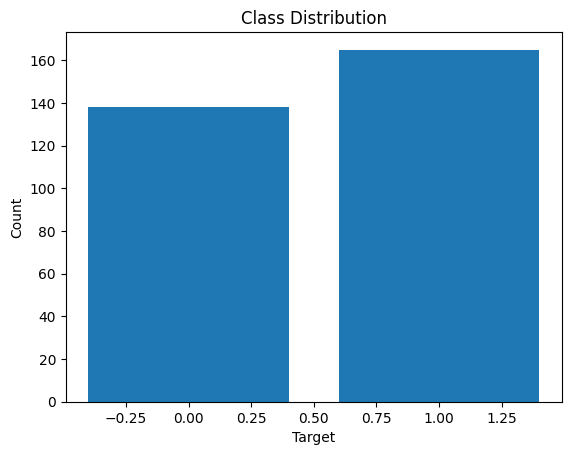

In [154]:
# Count the occurrences of each class
class_counts = data['target'].value_counts()

# Plot the class distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

We can visualize data using a combination of histograms, correlation plots, box plots (which can can also give an idea of distributions and outliers), scatter plots between interesting features etc

To start with we can begin with some summary statistics of the data before making the Visualizatoins

In [155]:
  data.shape

(303, 14)

In [156]:
data.info()
# we notice that most columns in integers data types (categorical, continuous etc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [157]:
data.describe()
# This will tell us summary statisics on each feature

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Histogram of thalach')

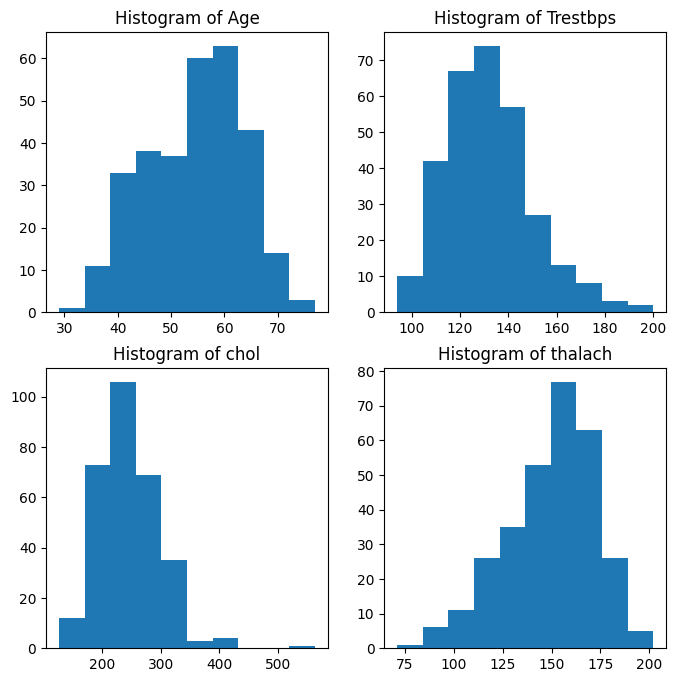

In [158]:
## Historgrams of key continuous features
fig, axs = plt.subplots(2, 2, figsize = (8,8))
axs[0,0].hist(data['age'])
axs[0, 0].set_title('Histogram of Age')
axs[0,1].hist(data['trestbps'])
axs[0,1].set_title('Histogram of Trestbps')
axs[1,0].hist(data['chol'])
axs[1,0].set_title('Histogram of chol')
axs[1,1].hist(data['thalach'])
axs[1,1].set_title('Histogram of thalach')

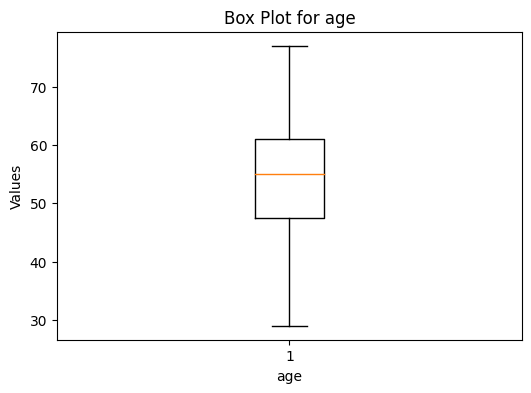

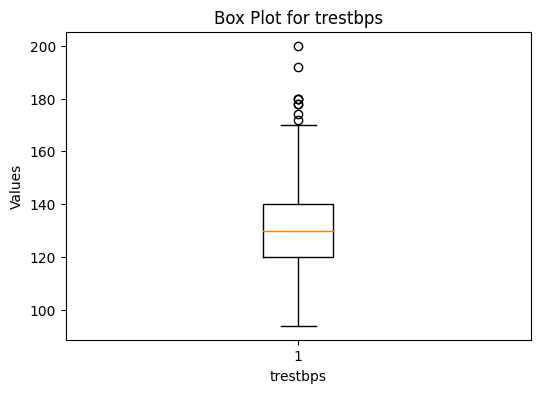

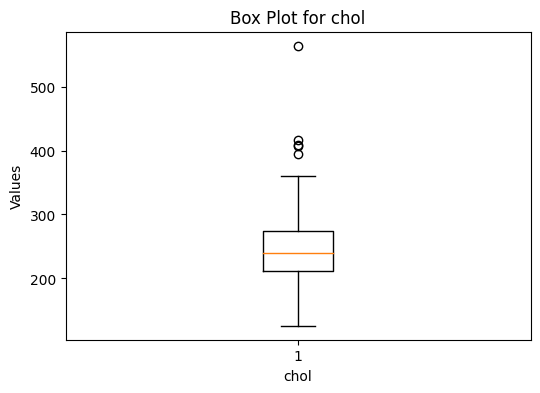

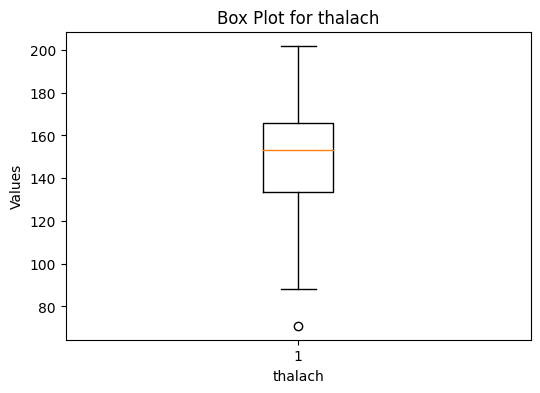

In [159]:
## We can generate boxplots

# Exclude the categorical features from the features

features = data[data.columns[data.columns.isin(['age', 'trestbps', 'chol'	, 'thalach' ])]]


# Create box plots for each feature
for column in features.columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(features[column])
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.title(f'Box Plot for {column}')
    plt.show()

<Axes: >

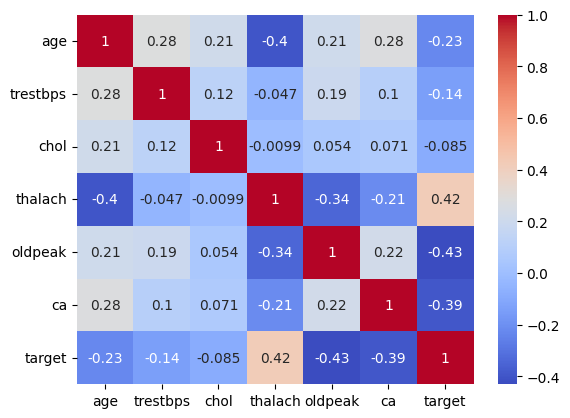

In [160]:
#Correlation matrix below shows us that none of the features are highly correlated to each other. So we will not remove any features on the basis of this information alone.
# Extract continuous columns for correlation analysis
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target']

# Calculate correlation matrix
correlation_matrix = data[columns].corr()

# Create heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

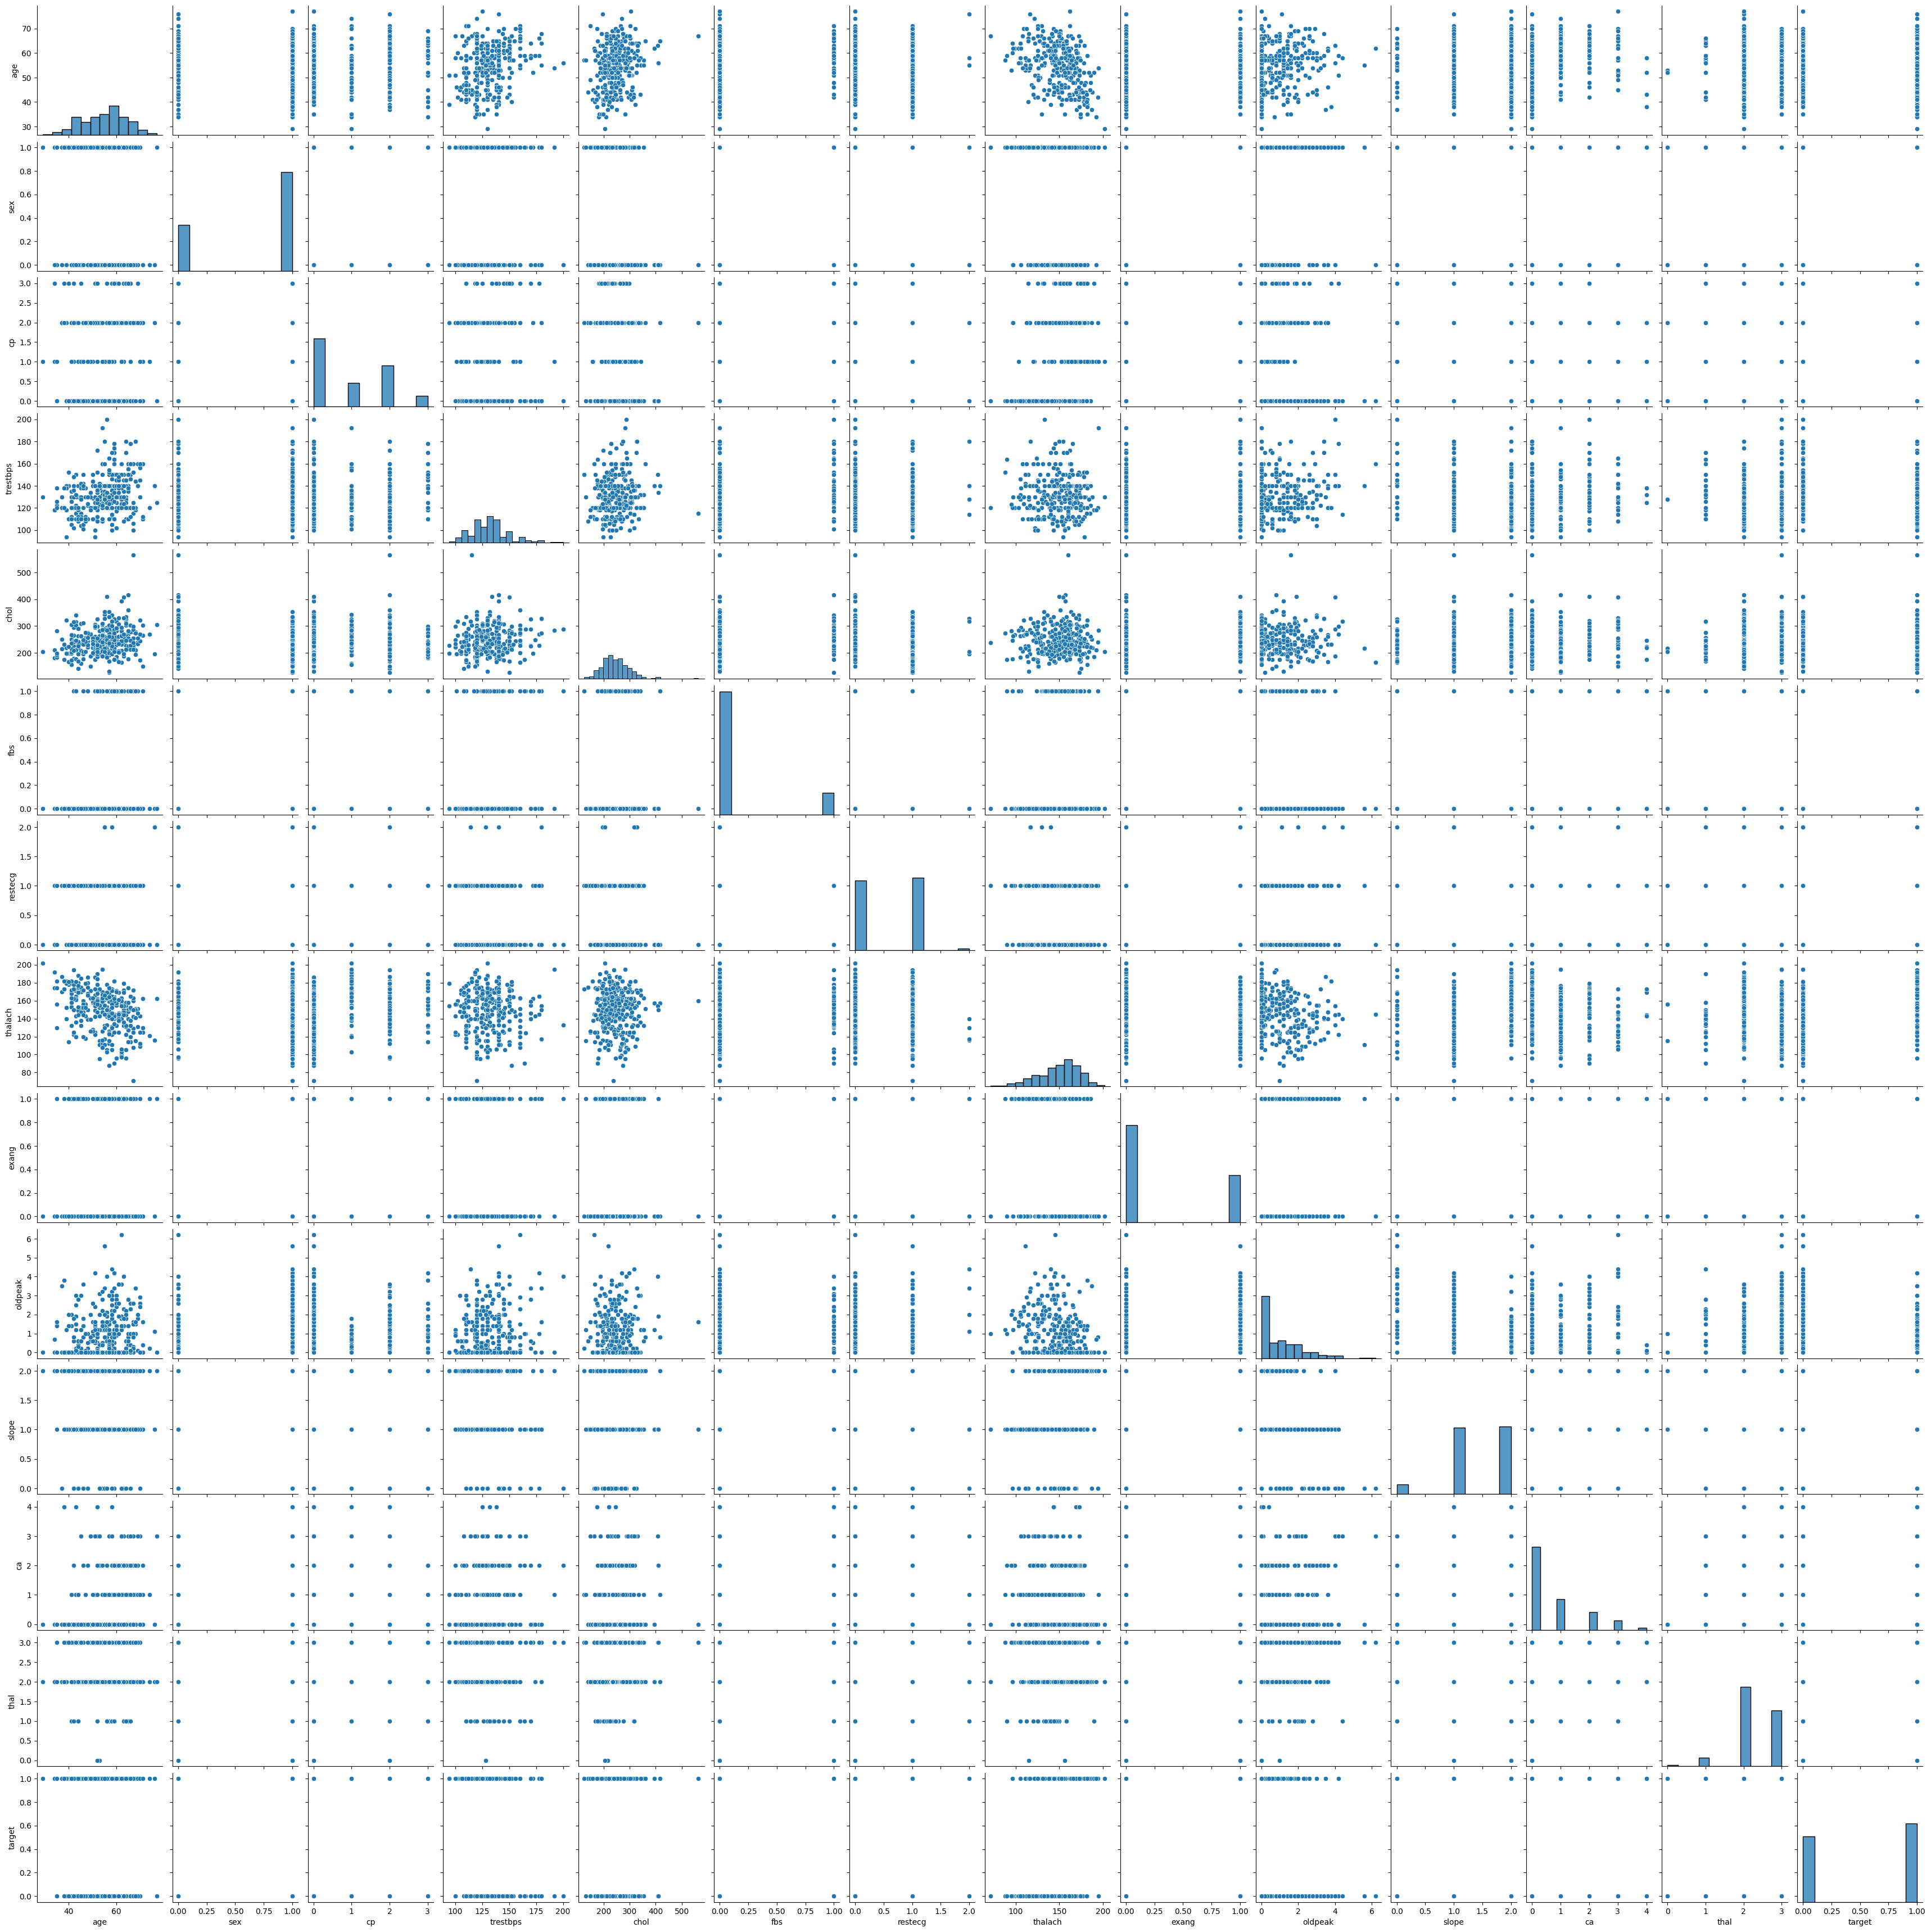

In [161]:
# We can Create a pairplot to visualize all interactions between features
sns.pairplot(data)
plt.show()

<Axes: xlabel='count', ylabel='sex'>

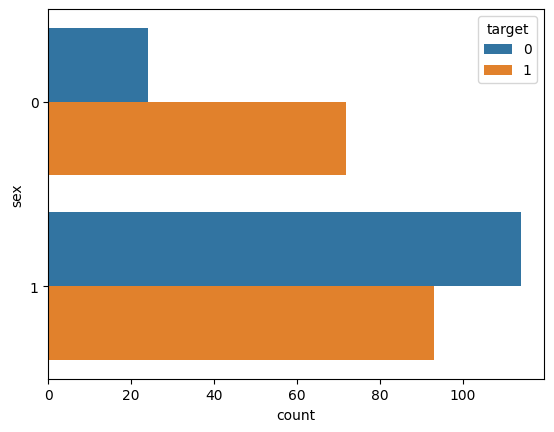

In [162]:
sns.countplot( y = 'sex' , data = data , hue = 'target' )

In [163]:
data.isna().count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

We observe basis the plots above,
1. Age is inversely to Thalack, as age goes up Thalach goes down
2. Females with target 1 or getting heart attack as more per this data
3. Majority of age lies around 60 years old
4. No nulls in the data, around 303 rows

#  Data Pre-processing and cleaning [2M]


1. Do the appropriate pre-processing of the data like identifying NULL or Missing
Values if any, handling of outliers if present in the dataset, skewed data etc.
Mention the pre-processing steps performed in the markdown cell. Explore a few
latest data balancing tasks and its effect on model evaluation parameters.
2. Apply appropriate feature engineering techniques for them. Apply the feature
transformation techniques like Standardization, Normalization, etc. You are free to
apply the appropriate transformations depending upon your dataset’s structure
and complexity. Provide proper justification. Techniques used without
justification will not be awarded marks. Explore a few techniques for identifying
feature importance for your feature engineering task.

In [164]:
# we see that there are no nulls as above, so there is no need to impute or remove any rows
# we can look for outliers in the continuous features

Outlier Detection & Treatment

In [165]:
# Using the IQR technique tofind outliers as below

continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Q1 = data[continuous_columns].quantile(0.25)
Q3 = data[continuous_columns].quantile(0.75)
IQR = Q3 - Q1
print ("Q1: ", Q1, "\n \n" " Q3: ", Q3, "\n \n", " IQR = ",  IQR)

Q1:  age          47.5
trestbps    120.0
chol        211.0
thalach     133.5
oldpeak       0.0
Name: 0.25, dtype: float64 
 
 Q3:  age          61.0
trestbps    140.0
chol        274.5
thalach     166.0
oldpeak       1.6
Name: 0.75, dtype: float64 
 
  IQR =  age         13.5
trestbps    20.0
chol        63.5
thalach     32.5
oldpeak      1.6
dtype: float64


In [166]:
## We will use 1.5 * IQR as an outlier detection, and if we find an outlier, we will just replace the value by the median of the given column
## We will replace with median, as median is least affected by the distribution of the data for that feature

# Calculate the median for each continuous column
medians = data[continuous_columns].median()

# Identify outliers based on the IQR
outliers = ((data[continuous_columns] < (Q1 - 1.5 * IQR)) | (data[continuous_columns] > (Q3 + 1.5 * IQR)))

# Replace outliers with column medians
data[continuous_columns] = np.where(outliers, medians, data[continuous_columns])

In [167]:
## For skew, we can find skewness in features as follows

# Calculate skewness for each continuous numerical columns
skewness = data[continuous_columns].skew()

# Print skewness values
print(skewness)

age        -0.202463
trestbps    0.243470
chol        0.184743
thalach    -0.463687
oldpeak     0.973920
dtype: float64


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

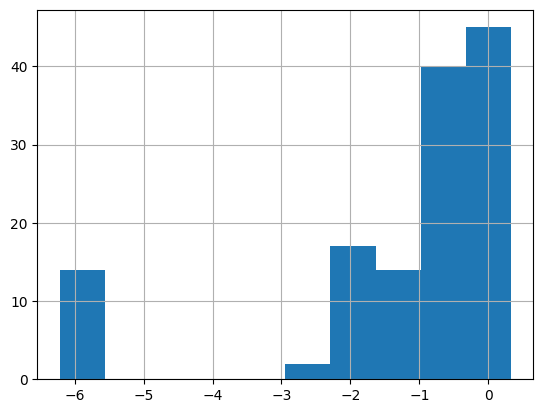

In [168]:
# we observe that oldpeak data is skewed as it's value is than 0.5, it's postive skew


# We will apply logarithmic transformation to 'oldpeak' column to reduce the skew
data['oldpeak'] = np.log(data['oldpeak'] + 0.001)

#plot histogram again
np.log(data['oldpeak'] + 0.001).hist()

Data Normalization

In [169]:
## For these continuous features we will apply Zscore normalisatoin (mean = 0, std 1)
# This will help as all the features are on a different scale

# Create a StandardScaler object
scaler = StandardScaler()

# Apply Z-score normalization to the continuous columns
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])


In [170]:
# now we observe they are in the same normalized scale
data[continuous_columns].describe()

,age,trestbps,chol,thalach,oldpeak
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,4.690051e-17,-3.986543e-16,-1.524267e-16,-4.690051e-16,1.172513e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.389389e+00,-2.620371e+00,-2.762233e+00,-1.403011e+00
25%,-7.572802e-01,-6.681376e-01,-7.165752e-01,-6.654920e-01,-1.403011e+00
50%,6.988599e-02,-6.117676e-03,-6.704495e-02,1.375154e-01,5.917900e-01
75%,7.316189e-01,6.559022e-01,6.496781e-01,7.174652e-01,7.984119e-01
max,2.496240e+00,2.641962e+00,2.620667e+00,2.323480e+00,1.071686e+00


Data Skewness for Categorical features

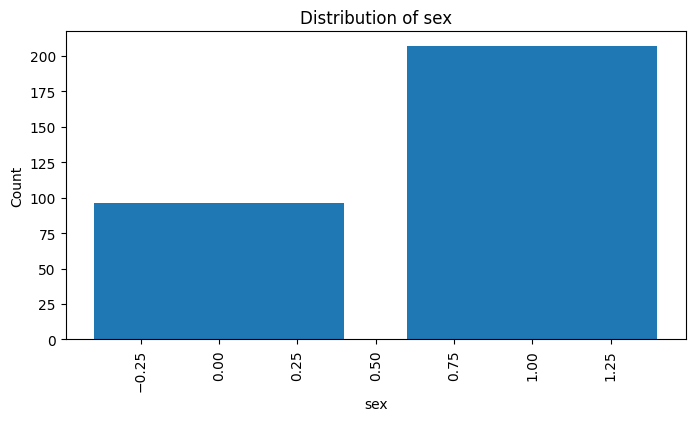

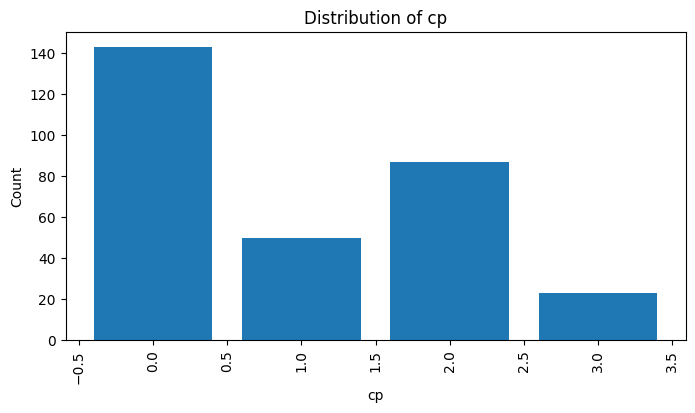

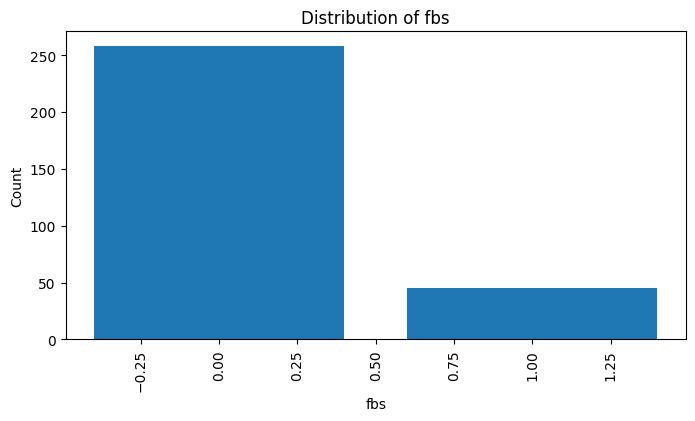

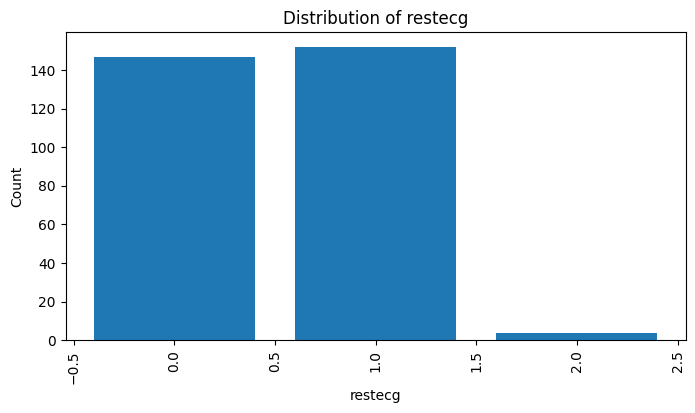

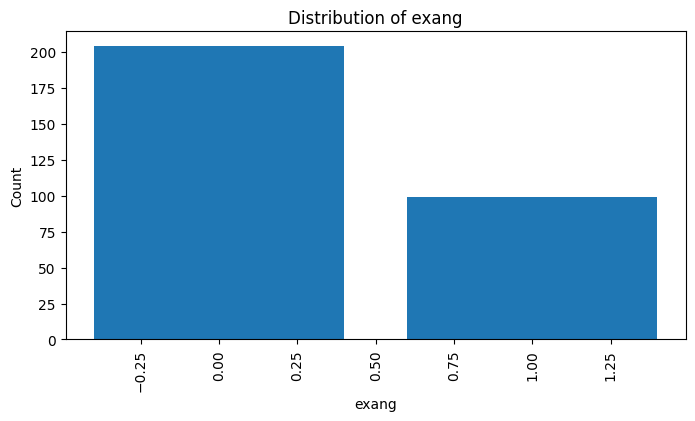

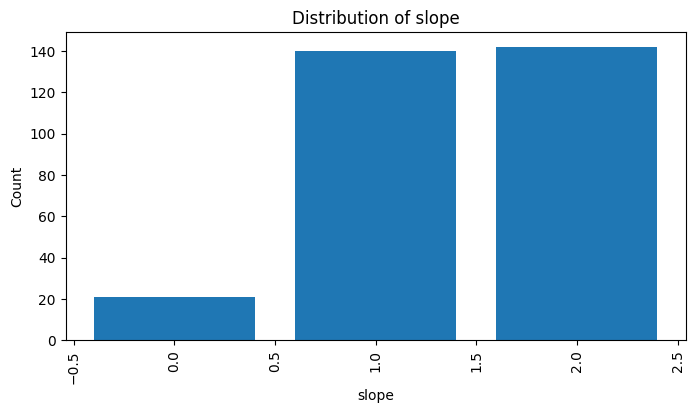

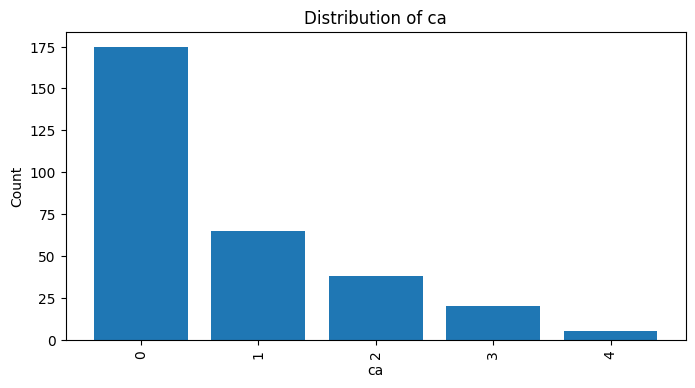

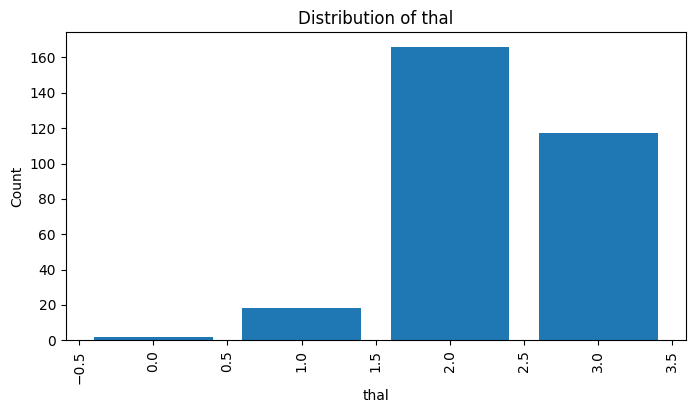

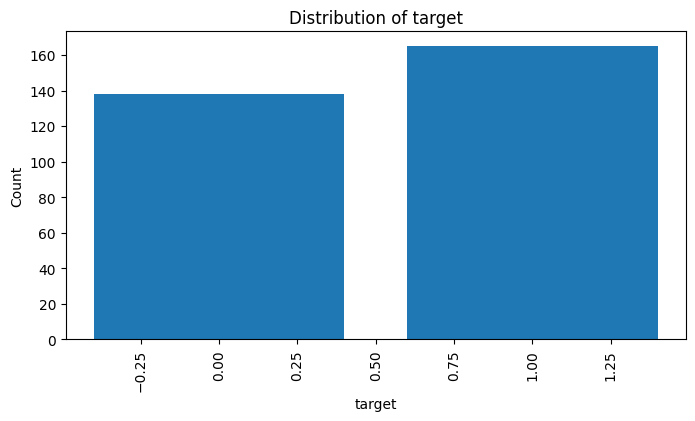

In [171]:
## To repeat these feature engineering steps for categorical columns, we will firstly find the categorical feature counts

# Select categorical columns
categorical_columns = data.select_dtypes(include='int64').columns

# Calculate frequency counts for each category in categorical columns
for column in categorical_columns:
    category_counts = data[column].value_counts()

    # Plot the bar chart
    plt.figure(figsize=(8, 4))
    plt.bar(category_counts.index, category_counts.values)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

# we observe that most catergorical features have some level of skew, especially age,slope, thal,cp
# the way we will deal with this is by undersampling or oversampling technique when training the model to ensure same representation



Feature Importance

In [172]:
# For Continuous features we can use correlation as a measure of feature importance, but since target is a categorical feature
# and also most of the features are categorical we cannot use correlation. Instead we can use Chi square test or
# we can also use a classifier to test the impact an feature has on predicting the target, and basis that create a importance

# Here we will try to do that with a Randomforest classifier

# Split the dataset into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Train a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Obtain feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)


cp          0.139206
oldpeak     0.117299
thalach     0.108901
thal        0.108846
ca          0.108276
age         0.090864
chol        0.082117
trestbps    0.071342
exang       0.055245
slope       0.054720
sex         0.033948
restecg     0.019035
fbs         0.010203
dtype: float64


# Model Building [5M]


1. Split the dataset into training and test sets. Answers without justification will
not be awarded marks. [1 M]
Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ;
[ x_test1,y_test1] = 20% ;
Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ;
[ x_test2,y_test2] = 90%
2. Explore k-fold cross-validation. [1M]
3. Build Model/s using 1) Logistc Regression [3M]
3.1. Do the prediction for the test data and display the results for the inference.
Calculate all the evaluation metrics and choose the best for your model. Justify
your answer. Answers must have justification to be awarded marks. [1M]
3.2. List out the performance measures in a tabular format. (Accuracy, F1-score,
Efficiency, sensitivity or specificity) [1M]

In [173]:
#First we will split the data into train and test as required
# for Case 1 we will keep 20% of data in testing, case 2 = 90%


X = data.drop('target', axis=1)
y = data['target']

# Case 1
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
# Stratify ensures stratified rnadom sampling is used. and both classes are equally represent in the data

# Case 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.9, random_state=42, stratify = y)


K Fold cross validation is a resampling technique. We split the data into k groups, The model is training on 1 group and testing is performed on all the remaining k-1 groups. This ensures that the entire data is used for training and validating the model. The model is trained and evaluated k times, and the evaluation results are averaged to obtain an overall performance metric. It helps to mitigate the impact of data variability and can give a more accurate estimation of the model's generalization ability.

We will use this technique below for training the logistic regression.



**Training Logistic Regression using K-Fold Cross Validation**

In [174]:
# Define the number of folds (k)
k = 5

# Using Sklearn Kfold module, shuffle ensures random sampling in each fold

# Initialize the KFold object
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a list to store the evaluation results
accuracy_scores = []

# Iterate over the folds
for train_index, test_index in kfold.split(X):
    # Split the data into train and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model performance for this fold
    accuracy = accuracy_score(y_test, y_pred)

    # Store the evaluation result
    accuracy_scores.append(accuracy)

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / k

# Print the average accuracy
print(f"Average Accuracy using KFold Cross validation: {average_accuracy}")

Average Accuracy using KFold Cross validation: 0.8250273224043717


The Average Accuracy using 5Fold Cross validation is 83%. Please note the accuracy score for each iteration of cross validation. It's ranging from 87% - 77%. This means our cross validation technique has averaged out sampling bias and given us a more generalised model, that should be more stable and generalise to new data.

In [175]:
## These are the accuracies for each cross validation interation
print (accuracy_scores)

[0.8688524590163934, 0.819672131147541, 0.8032786885245902, 0.7666666666666667, 0.8666666666666667]


Next we can try to run the code for our case 1 and case 2 test/train split created earlire

In [176]:
## Case1

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred1 = model.predict(X_test1)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test1, y_pred1)

# Print the accuracy
print(f"Accuracy for Case 1: {accuracy}")

Accuracy for Case 1: 0.7704918032786885


In [177]:
## Case2

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred2 = model.predict(X_test2)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test2, y_pred2)

# Print the accuracy
print(f"Accuracy for Case 2: {accuracy}")

Accuracy for Case 2: 0.6959706959706959


As we observe above, the test accuracy for case 1 is better (77%) vs case 2 (70%).This is because with more training data, the model is able to understand the hypothesis better.

Evaluation Metrics
Let's calculate other evaluation metrics. We used Accuracy above as the target class is balanced with both positive and negative cases (around 54%/46%). So accuracy is a good measure to test model performance.

In [178]:
# We will use Sklearn Classification Report module to generate other types of evaluation metrics
# Calculate multiple evaluation metrics

# Case 1
# Calculate accuracy
accuracy1 = accuracy_score(y_test1, y_pred1)

# Calculate precision
precision1 = precision_score(y_test1, y_pred1)

# Calculate recall (sensitivity)
recall1 = recall_score(y_test1, y_pred1)

# Calculate F1-score
f1_1 = f1_score(y_test1, y_pred1)

# Calculate specificity
specificity1 = recall_score(y_test1, y_pred1, pos_label=0)

# Print the evaluation metrics
print ("Evaluation metrics for case 1 \n")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-score: {f1}")
print(f"Specificity: {specificity}")

Evaluation metrics for case 1 

Accuracy: 0.6959706959706959
Precision: 0.8709677419354839
Recall (Sensitivity): 0.8709677419354839
F1-score: 0.8709677419354839
Specificity: 0.8620689655172413


We can also calculate these evaluation metrics for case 2 to compare. Please find below.

In [179]:
# Case 2
# Calculate accuracy
accuracy2 = accuracy_score(y_test2, y_pred2)

# Calculate precision
precision2 = precision_score(y_test2, y_pred2)

# Calculate recall (sensitivity)
recall2 = recall_score(y_test2, y_pred2)

# Calculate F1-score
f1_2 = f1_score(y_test2, y_pred2)

# Calculate specificity
specificity2 = recall_score(y_test2, y_pred2, pos_label=0)

# Print the evaluation metrics
print ("Evaluation metrics for case 2 \n")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-score: {f1}")
print(f"Specificity: {specificity}")

Evaluation metrics for case 2 

Accuracy: 0.6959706959706959
Precision: 0.8709677419354839
Recall (Sensitivity): 0.8709677419354839
F1-score: 0.8709677419354839
Specificity: 0.8620689655172413


If we compare the F1 score which is a combination (harmonic mean) of both precision and recall, we observe that F1 score for case 1 is 0.81, and for case 2 is 0.74. Hence, Case 1 is performing better basis F1 score and accuracy both.

We can use the evaluation metric basis the cost assosicated with a false positive or false negative. In our case, as we are dealing with heart attack, we might be okay with some false positive, but we may want to minimise the false negatives completely (so that no possible heart attack case gets missed)

We can combine these results in a tabular form to compare both case 1 and case 2 models.


In [180]:
# Create a dataframe to store the evaluation metrics
metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall (Sensitivity)', 'F1-Score', 'Specificity'],
    'Case 1': [accuracy1, precision1, recall1, f1_1, specificity1],
    'Case 2': [accuracy2, precision2, recall2, f1_2, specificity2]
})

# Print the metrics table
print(metrics_table)

                 Metric    Case 1    Case 2
0              Accuracy  0.770492  0.695971
1             Precision  0.743590  0.691860
2  Recall (Sensitivity)  0.878788  0.798658
3              F1-Score  0.805556  0.741433
4           Specificity  0.642857  0.572581


We can also generate the All the evaluation metrics from the 5fold Cross Validation method here to compare with.

**Generating Evaluation Metrics using Cross validation technique**

In [181]:
# Define the number of folds (k)
k = 5

# Using Sklearn Kfold module, shuffle ensures random sampling in each fold

# Initialize the KFold object
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a list to store the evaluation results
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []

# Iterate over the folds
for train_index, test_index in kfold.split(X):
    # Split the data into train and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision
    precision = precision_score(y_test, y_pred)

    # Calculate recall (sensitivity)
    recall = recall_score(y_test, y_pred)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred)

    # Calculate specificity
    specificity = recall_score(y_test, y_pred, pos_label=0)

    # Store the evaluation result
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)


# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / k
average_precision = sum(precision_scores)/k
average_recall = sum(recall_scores)/k
average_f1 = sum(f1_scores)/k
average_specificity = sum(specificity_scores)/k

# Print the average accuracy
print("Average Eval metrics using KFold Cross validation: ", average_accuracy, average_precision, average_recall, average_f1,
average_specificity)

Average Eval metrics using KFold Cross validation:  0.8250273224043717 0.8277936990604182 0.8673763312239544 0.844852289239386 0.7734310622466545


**We can now update our Table with the Evaluation metric table for Case 1 & Case 2, and also add results for the model trained with Crossvalidation results**

In [182]:
# Update metrics table with model trained with Cross validation Evaluation result
metrics_table['Cross validation'] = [average_accuracy, average_precision, average_recall, average_f1,
average_specificity]

# Print the metrics table
print(metrics_table)


                 Metric    Case 1    Case 2  Cross validation
0              Accuracy  0.770492  0.695971          0.825027
1             Precision  0.743590  0.691860          0.827794
2  Recall (Sensitivity)  0.878788  0.798658          0.867376
3              F1-Score  0.805556  0.741433          0.844852
4           Specificity  0.642857  0.572581          0.773431
